In [6]:
from src import video
import importlib
importlib.reload(video)
from src.predictorinterface import LinearRegressionPredictor, KalmanFilterPredictor


In [7]:
values = [(2, 1),
          (2, 2),
          ]

In [8]:
video_yolo = video.VideoYOLO("yolov8n.pt", "input_videos/Stockholm-Walks-Luntmakargatan-short-1.mp4", "stockholm_out.mp4", past_frame_len=5, prediction_frame_len=1, show=False, debug=False, predictor=LinearRegressionPredictor())
video_yolo.start()
print(video_yolo.eval())

0: 384x640 1 bicycle, 1 car, 61.0ms
Speed: 2.6ms preprocess, 61.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 1 bicycle, 1 car, 56.4ms
Speed: 1.7ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 1 bicycle, 1 car, 52.9ms
Speed: 1.3ms preprocess, 52.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 1 bicycle, 1 car, 58.1ms
Speed: 1.4ms preprocess, 58.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 1 bicycle, 1 car, 55.1ms
Speed: 1.2ms preprocess, 55.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 1 bicycle, 1 car, 57.8ms
Speed: 1.7ms preprocess, 57.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 1 bicycle, 1 car, 58.5ms
Speed: 0.9ms preprocess, 58.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 1 bicycle, 1 car, 57.2ms
Speed: 1.8ms preprocess, 57.2ms i

In [9]:
# Define the maximum value
max_value = 10

# Generate array of tuples with all combinations of x and y until max_value
combinations = [(x, y) for x in range(1, max_value + 1) for y in range(1, max_value + 1)]

# Print the array of tuples
print("Combinations of tuples", ":")
print(combinations)
print(len(combinations))

Combinations of tuples :
[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (10, 1), (10, 2), (10, 3), (10, 4), (10, 5), (10, 6), (10, 7), (10, 8), (10, 9), (10, 10)]
100


In [11]:
mse_dict = {}
for (x,y) in combinations:
    print(x, y)
    video_yolo = video.VideoYOLO("yolov8n.pt", "input_videos/trimmed.mp4", "out.mp4", past_frame_len=x, prediction_frame_len=y, show=False, debug=False, predictor=LinearRegressionPredictor())
    video_yolo.start()
    mse_dict[(x,y)] = video_yolo.eval()

1 1
0: 384x640 3 persons, 1 car, 1 potted plant, 57.0ms
Speed: 3.1ms preprocess, 57.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 3 persons, 1 car, 1 potted plant, 54.4ms
Speed: 1.9ms preprocess, 54.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 4 persons, 1 car, 1 potted plant, 52.5ms
Speed: 1.9ms preprocess, 52.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 4 persons, 1 car, 1 potted plant, 58.7ms
Speed: 1.6ms preprocess, 58.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 4 persons, 1 car, 1 potted plant, 50.5ms
Speed: 1.5ms preprocess, 50.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 4 persons, 1 car, 1 potted plant, 65.0ms
Speed: 1.6ms preprocess, 65.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
0: 384x640 5 persons, 1 car, 1 potted plant, 58.6ms
Speed: 1.5ms preprocess, 58.6ms inference, 0.7ms p

In [12]:

print(mse_dict)

{(1, 1): 1060.8781148875696, (1, 2): 997.8731023092288, (1, 3): 1015.8274488256988, (1, 4): 1053.8485564620457, (1, 5): 974.179252871227, (1, 6): 968.0243676436445, (1, 7): 938.7687380883418, (1, 8): 916.5081853647107, (1, 9): 947.8243221227367, (1, 10): 983.6052889376838, (2, 1): 1314.819586420788, (2, 2): 3724.4989581425016, (2, 3): 8340.226937410329, (2, 4): 14155.089430523605, (2, 5): 22276.057579056647, (2, 6): 31074.21394881017, (2, 7): 42235.85803929303, (2, 8): 57701.46892189156, (2, 9): 76135.4680889227, (2, 10): 69731.77208196353, (3, 1): 1238.551189470362, (3, 2): 2889.799160870367, (3, 3): 5354.872840029256, (3, 4): 9410.149696787432, (3, 5): 15131.786602897255, (3, 6): 19971.912131312733, (3, 7): 27680.9938285891, (3, 8): 38191.540200878575, (3, 9): 45238.40375872306, (3, 10): 43500.787744529356, (4, 1): 1531.2918750188157, (4, 2): 2629.551985356897, (4, 3): 4887.76808229021, (4, 4): 8029.480891299361, (4, 5): 11755.858440516764, (4, 6): 16829.161090897043, (4, 7): 23503.2

(12, 14)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(2, 10)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(3, 10)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(4, 10)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(5, 10)
(6, 1)
(6, 2)
(6, 3)
(6, 4)
(6, 5)
(6, 6)
(6, 7)
(6, 8)
(6, 9)
(6, 10)
(7, 1)
(7, 2)
(7, 3)
(7, 4)
(7, 5)
(7, 6)
(7, 7)
(7, 8)
(7, 9)
(7, 10)
(8, 1)
(8, 2)
(8, 3)
(8, 4)
(8, 5)
(8, 6)
(8, 7)
(8, 8)
(8, 9)
(8, 10)
(9, 1)
(9, 2)
(9, 3)
(9, 4)
(9, 5)
(9, 6)
(9, 7)
(9, 8)
(9, 9)
(9, 10)
(10, 1)
(10, 2)
(10, 3)
(10, 4)
(10, 5)
(10, 6)
(10, 7)
(10, 8)
(10, 9)
(10, 10)


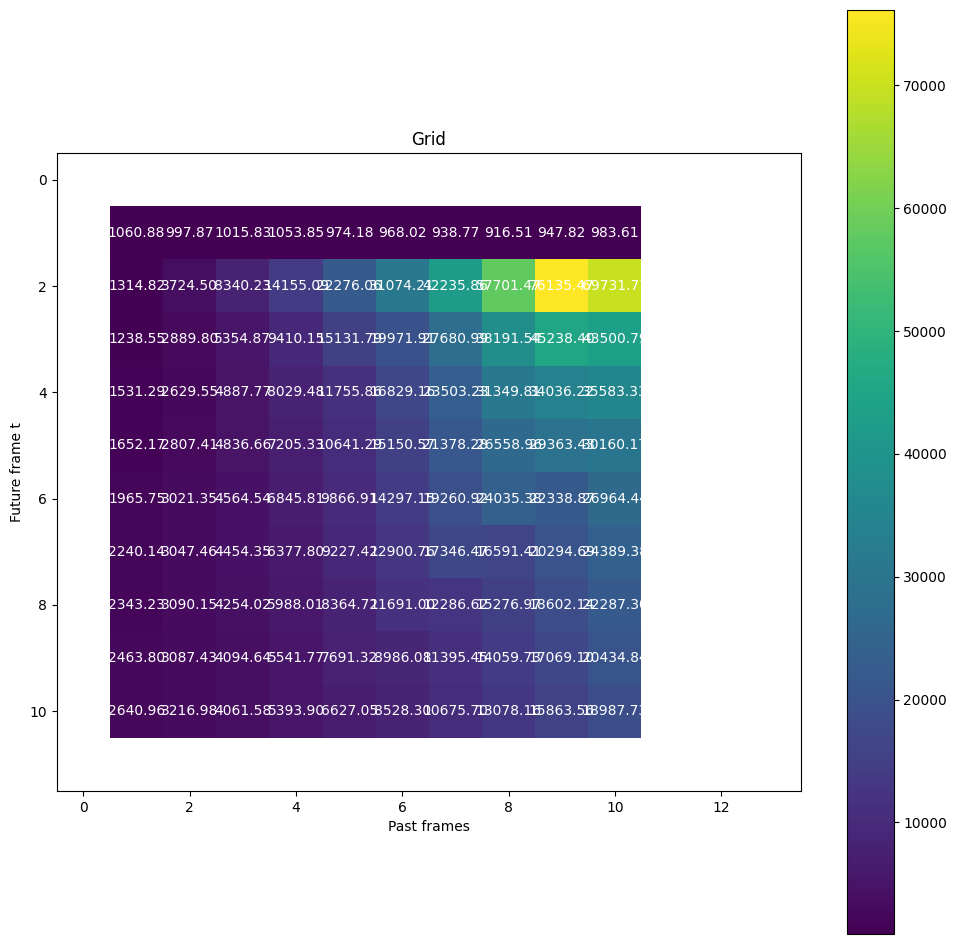

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

now = datetime.now()

formatted_datetime = now.strftime("%Y-%m-%d-%H-%M-%S")
rows = list(mse_dict.keys())[-1][0] + 2
cols = list(mse_dict.keys())[-1][1] + 4
print((rows, cols))
grid_values = mse_dict

array_values = np.zeros((rows, cols))
for coord, value in grid_values.items():
  print(coord)
  array_values[coord[0], coord[1]] = value

array_values[array_values == 0] = np.nan
plt.figure(figsize=(12,12))
plt.imshow(array_values, cmap='viridis', interpolation='nearest')

for i in range(rows):
    for j in range(cols):
        if not np.isnan(array_values[i, j]):
            plt.text(j, i, f'{array_values[i, j]:.2f}', ha='center', va='center', color='white')


plt.figure(figsize=(15,15))
plt.colorbar()
plt.title('Grid')
plt.xlabel('Past frames')
plt.ylabel('Future frame t')
plt.grid(visible=False)
plt.savefig(f"imgs/grid/{formatted_datetime}")
plt.show()
